# Ankita Ashok Dalvi

# Used Cars Project

**Overview : Perform EDA on sample sales data and build simple sales price prediction model**

Total Records in the Dataset : 226013

Total Columns in the Dataset : 22

**Columns in the dataset and their potential relevance:**

Lot Number:
Not likely to be directly relevant for predicting sale price. Considered as a unique identifier.

Yard Zip Code:
Could be relevant if the geographical location affects sale prices. May help in understanding regional variations.

Assignment Date, Loss Date, Invoice Date:
Time-related features. Analyzing trends over time could provide insights. It might be beneficial to extract additional features like month and year.

Vehicle Type, Lot Year, Make, Group Model, Lot Model:
Vehicle-related information. These are likely to be important features for predicting sale price.

ACV (Actual Cash Value):
This is a direct indicator of the value of the vehicle and should be highly relevant for predicting sale price.

Repair Est.:
Estimated repair cost. May provide information on the condition of the vehicle.

Loss Type, Primary Damage Type, Secondary Damage Type, Severity of Damage:
Information about the damage sustained by the vehicle. These features can give insights into the condition of the vehicle, which is crucial for predicting sale price.

Run Condition:
Indicates the status of the unit's engine and driving capacity. Could impact the sale price.

Title Group:
Indicates the category of the unit's title (clean, salvage, or junk). This could influence the perceived value and sale price.

Odometer, Odometer Brand:
Mileage-related information. Important for understanding the wear and tear on the vehicle.

Has Keys:
Indicates whether the unit has keys. May impact the perceived value and sale price.

Sale Price:
The target variable for prediction.

**To summarize, the columns like Lot Number, Yard Zip Code, and the date-related columns may not be directly relevant for predicting sale price. Features related to the vehicle itself, its condition, and associated costs are likely to be crucial. Additionally, exploring the relationships between these features and the target variable through EDA can provide valuable insights.**

# Importing required libraries in Python: 

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics

# Data Import and Summary Statistics:

In [2]:
#Data Import
Sales_data = pd.read_csv("Data_Scientist_Test_Problem.csv")

In [3]:
Sales_data.shape

(226013, 22)

In [4]:
Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Lot Number             226013 non-null  int64  
 1   Yard Zip Code          226013 non-null  int64  
 2   Assignment Date        226013 non-null  int64  
 3   Loss Date              226013 non-null  int64  
 4   Invoice Date           226013 non-null  int64  
 5   Vehicle Type           215711 non-null  object 
 6   Lot Year               226013 non-null  int64  
 7   Make                   226013 non-null  object 
 8   Group Model            184294 non-null  object 
 9   Lot Model              226013 non-null  object 
 10  ACV                    226013 non-null  float64
 11  Repair Est.            226013 non-null  float64
 12  Loss Type              103715 non-null  object 
 13  Primary Damage Type    226013 non-null  object 
 14  Secondary Damage Type  226013 non-nu

In [5]:
Sales_data.head()

Lot Number  Yard Zip Code  Assignment Date  Loss Date  Invoice Date  \
0    26891434          87105         20200110   20200108      20200227   
1    60309846          85043         20230920   20220913      20221003   
2    57623533          85043         20191122   20191122      20200203   
3    46910394          85043         20200819   20200817      20200922   
4    43189105          85706         20210510   20210510      20210625   

  Vehicle Type  Lot Year   Make Group Model   Lot Model  ...  Loss Type  \
0            V      2012  HOND          NaN  CIVIC LX    ...          C   
1            V      2005  NISS          NaN  ALTIMA S    ...          P   
2            V      2006  ACUR   TSX         TSX         ...        NaN   
3            V      2013  NISS   VERSA       VERSA S     ...          C   
4            V      2004  DODG   RAM 1500    RAM 1500 S  ...        NaN   

   Primary Damage Type Secondary Damage Type Severity of Damage Run Condition  \
0                   FR                                        1             D   
1                   RR                 FR                     2             D   
2                   FR                 UN                     2             S   
3                   FR                                        2             D   
4                   FR                 RR                     1             D   

   Title Group Odometer Odometer Brand  Has Keys Sale Price  
0            S        0              N         Y     1700.0  
1            S    75583              A         Y        1.0  
2            S   141147              A         Y      800.0  
3            S    98347              A         Y     2000.0  
4            S   186776              A         Y     2200.0  

[5 rows x 22 columns]

In [6]:
Sales_data.describe()

Lot Number  Yard Zip Code  Assignment Date     Loss Date  \
count  2.260130e+05  226013.000000     2.260130e+05  2.260130e+05   
mean   4.630429e+07   85597.438572     2.020515e+07  2.019412e+07   
std    1.133657e+07     846.899091     1.150445e+04  4.498035e+05   
min    1.800964e+07   85043.000000     2.014063e+07  0.000000e+00   
25%    3.685354e+07   85043.000000     2.019123e+07  2.019113e+07   
50%    4.638322e+07   85043.000000     2.021011e+07  2.020120e+07   
75%    5.537084e+07   85706.000000     2.021112e+07  2.021102e+07   
max    7.143466e+07   87105.000000     2.023112e+07  2.022112e+07   

       Invoice Date       Lot Year           ACV   Repair Est.  \
count  2.260130e+05  226013.000000  2.260130e+05  2.260130e+05   
mean   2.020690e+07    2011.306075  1.231061e+04  9.949841e+03   
std    1.099807e+04       6.147569  1.219601e+04  1.780425e+04   
min    2.019010e+07    1918.000000  0.000000e+00  0.000000e+00   
25%    2.020022e+07    2007.000000  5.432290e+03  4.300000e+03   
50%    2.021032e+07    2013.000000  9.362000e+03  8.155720e+03   
75%    2.022013e+07    2016.000000  1.560600e+04  1.341544e+04   
max    2.023113e+07    2023.000000  1.230000e+06  6.336204e+06   

       Severity of Damage      Odometer    Sale Price  
count       226013.000000  2.260130e+05  2.260130e+05  
mean             1.594240  9.413479e+04  9.322980e+03  
std              0.781033  7.715331e+04  7.206013e+04  
min              0.000000  0.000000e+00  0.000000e+00  
25%              1.000000  3.470300e+04  9.500000e+02  
50%              2.000000  8.869000e+04  2.050000e+03  
75%              2.000000  1.409370e+05  4.200000e+03  
max              3.000000  4.479550e+06  5.200000e+06

# Data Cleaning and Pre-processing:

Below are the steps for Data Cleaning and Pre-processing part which I performed on the Data:

1. Replaced spaces/tabs in the dataset with Null values.
2. Dropped Duplicates present in the dataset.
3. Checked for Null Values and treated the columns containing Null values as below:
    - Vehicle Type: Replaced null values in this categorical column by creating a new category called 'Unknown'.
    - Group Model: Dropped this column as for most of the records this column had data which was related to the data in Lot Model column. 
    - Loss Type: Dropped this column as it was Null for almost 50% of the records in the dataset. 
    - Secondary Damage Type: Dropped this column as it was Null for almost 50% of the records in the dataset. 
    - Title Group, Odometer Brand, Has Keys: Mode Imputation as there were only few Null values present in this column. Mode Imputations preserve original distribution of the categorical variable
4. Checked for some records Assignment Date was greater tha Invoice Date which I feel was not appropriate as company would be able to generate an Invoice and sell it once it is Assigned by the consigner. Hence, dropped the columns where Invoice Date < Assignment Date.
5. Deleting any blank spaces present in the Lot Model column (categorical) and replacing spaces between words with underscore '_' by changing it to uppercase, so that any duplicate categories present would be eliminated.
6. Some rows had value for Sale Price as 0, which were dropped assuming it to be errorneous.
7. Extracting Month and Year details from Invoice Date, Assignment Date and Loss Date

Post Data Cleaning - 
Total records: 213785, Total columns: 22

Below is the code for above mentioned steps.

In [7]:
#For extra spaces in the columns
Sales_data.replace(['', ' ', '  ','     ', '\t'], np.nan, inplace=True)

In [8]:
# Drop Duplicates
Sales_data.duplicated().sum()

5870

In [9]:
Sales_data=Sales_data.drop_duplicates()

In [10]:
#Handling Null Values
Sales_data.isna().sum()

Lot Number                    0
Yard Zip Code                 0
Assignment Date               0
Loss Date                     0
Invoice Date                  0
Vehicle Type              10302
Lot Year                      0
Make                          0
Group Model               41719
Lot Model                     0
ACV                           0
Repair Est.                   0
Loss Type                122299
Primary Damage Type           0
Secondary Damage Type    123270
Severity of Damage            0
Run Condition                 0
Title Group                  26
Odometer                      0
Odometer Brand              170
Has Keys                      7
Sale Price                    0
dtype: int64

In [11]:
#Dropping below columns as Null values in that columns are more in number. 
#Also, Data in Group Model is a subset of the data in Lot Model. hence, dropping it.

columns_to_drop = ['Loss Type', 'Group Model','Secondary Damage Type']
Sales_data.drop(columns=columns_to_drop, inplace=True)

In [12]:
#Imputing Null Values in Vehicle Type column with a new category named 'Unknown'
Sales_data['Vehicle Type'].fillna('Unknown', inplace=True)

In [13]:
#Mode Imputation in Title Group, Odometer Brand and Has Keys column as they have <1% of the total values missing and it is less sensitive to outliers.
Sales_data['Has Keys'].value_counts(), Sales_data['Odometer Brand'].value_counts(), Sales_data['Title Group'].value_counts()

Sales_data['Has Keys'].fillna(Sales_data['Has Keys'].mode()[0], inplace=True)
Sales_data['Odometer Brand'].fillna(Sales_data['Odometer Brand'].mode()[0], inplace=True)
Sales_data['Title Group'].fillna(Sales_data['Title Group'].mode()[0], inplace=True)

In [14]:
Sales_data.isna().sum()

Lot Number             0
Yard Zip Code          0
Assignment Date        0
Loss Date              0
Invoice Date           0
Vehicle Type           0
Lot Year               0
Make                   0
Lot Model              0
ACV                    0
Repair Est.            0
Primary Damage Type    0
Severity of Damage     0
Run Condition          0
Title Group            0
Odometer               0
Odometer Brand         0
Has Keys               0
Sale Price             0
dtype: int64

In [1]:
# Observed some records have Assignment Date < Invoice Date. 
# As per my understanding it is not possible to sell the unit unless it is assigned to company by consigner.
# Dropped such records; record count = 6355

condition = Sales_data['Invoice Date'] < Sales_data['Assignment Date']
filtered_df = Sales_data[condition]
indices_to_drop = filtered_df.index
Sales_data.drop(indices_to_drop, inplace=True)

NameError: name 'Sales_data' is not defined

In [16]:
Sales_data.shape

(213788, 19)

In [17]:
# Deleting any spaces in Lot Model column and replacing it with underscore and converting all the data in Lot model to Uppercase
Sales_data['Lot Model'].value_counts()

SILVERADO     4482
ALTIMA 2.5    3704
SENTRA S      3003
CIVIC LX      2888
F150 SUPER    2434
              ... 
DURANGO TR       1
YZ85             1
GTI AUTOBA       1
XC125            1
F700 F           1
Name: Lot Model, Length: 4970, dtype: int64

In [18]:
Sales_data['Lot Model'] = Sales_data['Lot Model'].str.strip().str.upper().replace(r'\s+', '_', regex=True)

In [19]:
#Some of the records have Sale Price = 0, which is not possible. Hence, excluding such records from Dataset
Sales_data = Sales_data[Sales_data['Sale Price'] != 0]

In [20]:
Sales_data.shape

(213785, 19)

In [21]:
Sales_data.head()

Lot Number  Yard Zip Code  Assignment Date  Loss Date  Invoice Date  \
0    26891434          87105         20200110   20200108      20200227   
2    57623533          85043         20191122   20191122      20200203   
3    46910394          85043         20200819   20200817      20200922   
4    43189105          85706         20210510   20210510      20210625   
5    55144546          87105         20220805   20220804      20220825   

  Vehicle Type  Lot Year   Make   Lot Model       ACV  Repair Est.  \
0            V      2012  HOND     CIVIC_LX   5930.00     10723.42   
2            V      2006  ACUR          TSX   5981.05      8298.99   
3            V      2013  NISS      VERSA_S   6155.00      6133.36   
4            V      2004  DODG   RAM_1500_S   7312.68      5611.12   
5            V      2001  CHEV   CAMARO_Z28  14445.00     14445.00   

  Primary Damage Type  Severity of Damage Run Condition Title Group  Odometer  \
0                  FR                   1             D           S         0   
2                  FR                   2             S           S    141147   
3                  FR                   2             D           S     98347   
4                  FR                   1             D           S    186776   
5                  FR                   2             D           S    142273   

  Odometer Brand Has Keys  Sale Price  
0              N        Y      1700.0  
2              A        Y       800.0  
3              A        Y      2000.0  
4              A        Y      2200.0  
5              A        Y      2250.0

In [22]:
#Extracting Year and Month from Invoice Date, Assignment Date and Loss Date

def process_date_columns(Sales_data, date_columns):
    for col in date_columns:
        Sales_data[col] = Sales_data[col].astype(str)
        Sales_data[f'{col} Month'] = Sales_data[col].str[4:6].replace('', '0')
        Sales_data[f'{col} Year'] = Sales_data[col].str[:4].replace('', '0')

    Sales_data.drop(columns=date_columns, inplace=True)

    # Convert Month and Year columns to integers
    month_year_columns = [f'{col} Month' for col in date_columns] + [f'{col} Year' for col in date_columns]
    Sales_data[month_year_columns] = Sales_data[month_year_columns].astype(int)

# List of date columns
date_columns = ['Assignment Date', 'Invoice Date', 'Loss Date']

# Apply the function
process_date_columns(Sales_data, date_columns)


In [23]:
Sales_data.head()

Lot Number  Yard Zip Code Vehicle Type  Lot Year   Make   Lot Model  \
0    26891434          87105            V      2012  HOND     CIVIC_LX   
2    57623533          85043            V      2006  ACUR          TSX   
3    46910394          85043            V      2013  NISS      VERSA_S   
4    43189105          85706            V      2004  DODG   RAM_1500_S   
5    55144546          87105            V      2001  CHEV   CAMARO_Z28   

        ACV  Repair Est. Primary Damage Type  Severity of Damage  ...  \
0   5930.00     10723.42                  FR                   1  ...   
2   5981.05      8298.99                  FR                   2  ...   
3   6155.00      6133.36                  FR                   2  ...   
4   7312.68      5611.12                  FR                   1  ...   
5  14445.00     14445.00                  FR                   2  ...   

  Odometer Odometer Brand  Has Keys Sale Price Assignment Date Month  \
0        0              N         Y     1700.0                     1   
2   141147              A         Y      800.0                    11   
3    98347              A         Y     2000.0                     8   
4   186776              A         Y     2200.0                     5   
5   142273              A         Y     2250.0                     8   

   Assignment Date Year  Invoice Date Month  Invoice Date Year  \
0                  2020                   2               2020   
2                  2019                   2               2020   
3                  2020                   9               2020   
4                  2021                   6               2021   
5                  2022                   8               2022   

   Loss Date Month  Loss Date Year  
0                1            2020  
2               11            2019  
3                8            2020  
4                5            2021  
5                8            2022  

[5 rows x 22 columns]

In [24]:
Sales_data.describe()

Lot Number  Yard Zip Code       Lot Year           ACV   Repair Est.  \
count  2.137850e+05  213785.000000  213785.000000  2.137850e+05  2.137850e+05   
mean   4.630169e+07   85597.513287    2011.301378  1.230396e+04  9.946893e+03   
std    1.133988e+07     847.023859       6.155755  1.186381e+04  1.801474e+04   
min    1.800964e+07   85043.000000    1918.000000  0.000000e+00  0.000000e+00   
25%    3.684203e+07   85043.000000    2007.000000  5.430000e+03  4.302680e+03   
50%    4.637879e+07   85043.000000    2013.000000  9.362000e+03  8.158090e+03   
75%    5.537381e+07   85706.000000    2016.000000  1.560700e+04  1.341500e+04   
max    7.143466e+07   87105.000000    2023.000000  1.230000e+06  6.336204e+06   

       Severity of Damage      Odometer    Sale Price  Assignment Date Month  \
count       213785.000000  2.137850e+05  2.137850e+05          213785.000000   
mean             1.594766  9.410353e+04  9.660878e+03               6.532044   
std              0.780894  7.726181e+04  7.383347e+04               3.481242   
min              0.000000  0.000000e+00  1.000000e+00               1.000000   
25%              1.000000  3.468600e+04  1.000000e+03               3.000000   
50%              2.000000  8.863400e+04  2.100000e+03               7.000000   
75%              2.000000  1.408800e+05  4.300000e+03              10.000000   
max              3.000000  4.479550e+06  5.200000e+06              12.000000   

       Assignment Date Year  Invoice Date Month  Invoice Date Year  \
count         213785.000000       213785.000000      213785.000000   
mean            2020.420156            6.417139        2020.625530   
std                1.146060            3.439407           1.103072   
min             2014.000000            1.000000        2019.000000   
25%             2019.000000            3.000000        2020.000000   
50%             2020.000000            6.000000        2021.000000   
75%             2021.000000            9.000000        2022.000000   
max             2023.000000           12.000000        2023.000000   

       Loss Date Month  Loss Date Year  
count     213785.00000   213785.000000  
mean           6.62053     2019.314952  
std            3.46849       45.623179  
min            0.00000        0.000000  
25%            4.00000     2019.000000  
50%            7.00000     2020.000000  
75%           10.00000     2021.000000  
max           12.00000     2022.000000

In [25]:
Sales_data.shape #After Data Cleaning

(213785, 22)

In [26]:
Sales_data.to_csv('file.csv', index=False)

# Exploratory Data Analysis:

For performing EDA, below steps were performed:

1. Checked for the distribution of Sale Price.
    - Observed from the Sale Price histogram that there were outliers present and the distribution was extremely skewed. 
    - To tackle this, I performed Log transformation on Sale Price and then observed its distribution which was similar to Normal Distribution.
    
    
2. Compared Sale Price values against multiple categorical fields present in the dataset like Vehicle Type, Has Keys, Odometer Brand, Vehicle Type, Title Group, Run Condition, Severity of Damage.
    - Sale price is affected by most of the categorical columns mentioned above as seen from the bar plots. Average Sale Price value contains outliers which can be seen in the graphs plotted.
    
    
3. Examined the effect of Loss Year, Assignment Year and Invoice Year on Sale Price.
    - There is no such pattern observed for Assignment Year and Loss year.
    - Over the time Sale Price of units sold through company has been increasing since 2019 till now.
    
    
4. Created scatter plots to check the effect of Odometer, ACV and Repair Estimate columns on Sale Price.
    - As per the scatter plots obtained, Sale Price increases with increase in ACV and Repair Estimate but decreases with Increase in Odometer.
    
    
5. Created a line plot that visualizes the average sale count/price per month over multiple years (Invoice Year).
    - Interesting fact observed in these plots is that though the Sale count for 2023 is less the average Sale price for 2023 is the not the lowest. Despite of having such less sales in 2023, I assume reason for Average sale price to be comparatively more might be because of the increase in Sale Price values over the years which can be seen in point 3 or maybe because of extreme outliers present for 2023 data.
    

6. Created Bar chart for number of units assigned to company for each Assignment year.
    - Units assigned to company were the highest in 2021 followed by 2020 and 2022.
    
    
7. Examined the effect of Lot Year on Average Sale Price.
    - Average Sale Price is greater if Lot Year is recent. However, there are exceptions wherein spikes can be seen in the data for older classic models which are not sold in the market now.
    
    
8. Top 10 manufacturers with highest average Sale price.
    - GREA manufacturer has the highest average Sale Price followed by REEF and PUMA.


9. Top 10 models with highest average Sale Price.
    - X7_Drives (BMW) has the highest average Sale price among all the models followed by FREEDOM_EL (THOR) and VNR (VOLV).
    
    
10. Top 10 models with highest sale count.
     - Highest sold model is SILVERADO (CHEV) followed by ALTIMA_2.5 (NISS) AND SENTRA_S (NISS). 
    

11. Top 10 manufacturers with highest sale count and top 5 models for each of the top 10 manufacturers.
    - Manufacturer who had highest sale count is NISS followed by TOYT, FORD and CHEV.
    
    
12. Heatmap - Correlation matrix
    - Positive Correlation is observed between Log Sale Price and ACV, Lot Year, Repair Estimate.
    - Odometer, Severity Damage show negative Corelation as expected

Below is the code for above steps.


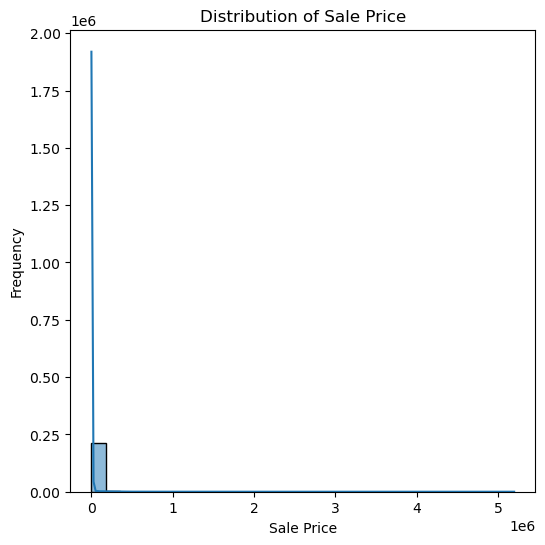

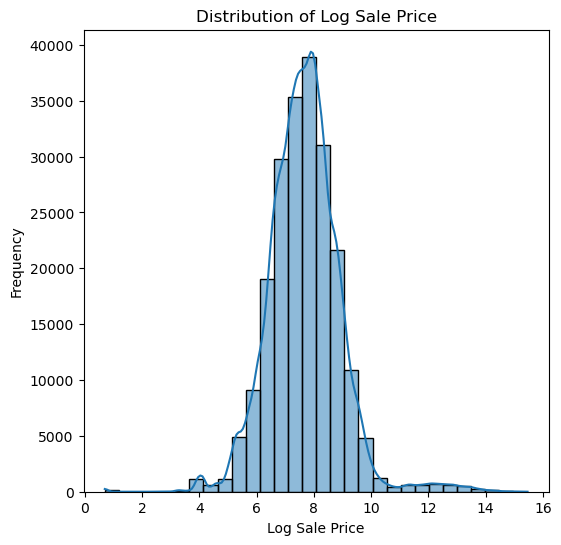

In [27]:
def plot_histplot(data, column_name):
    plt.figure(figsize=(6, 6))
    sns.histplot(data[column_name], bins=30, kde=True)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

# Original Sale Price
plot_histplot(Sales_data, 'Sale Price')

# Log Sale Price
Sales_data['Log Sale Price'] = np.log1p(Sales_data['Sale Price'])
plot_histplot(Sales_data, 'Log Sale Price')

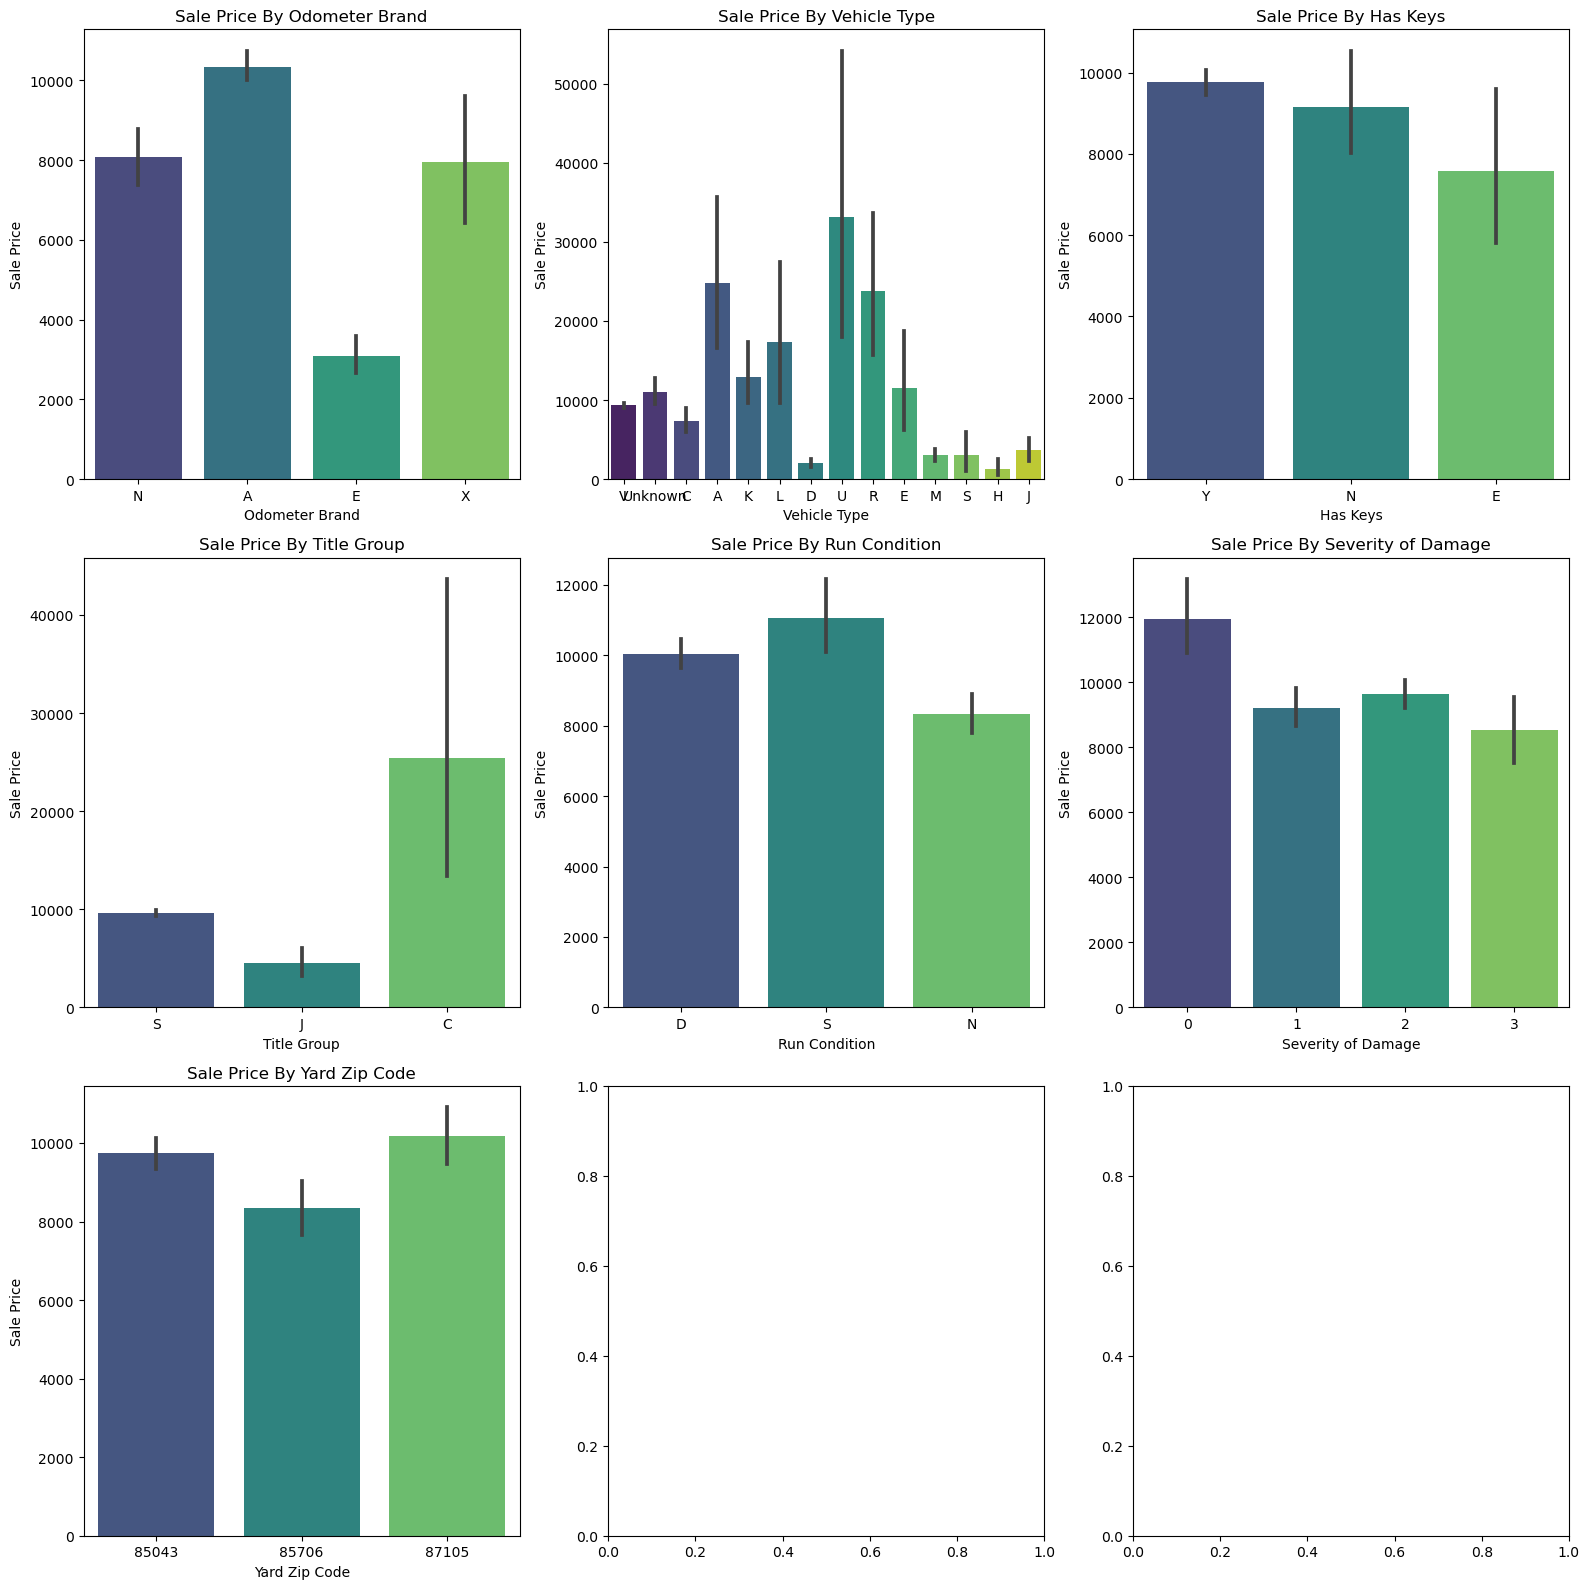

In [28]:
# Effect of Sale Price on Categorical columns
columns_to_plot = ['Odometer Brand', 'Vehicle Type', 'Has Keys', 'Title Group', 'Run Condition', 'Severity of Damage','Yard Zip Code']

# Define the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 16))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Loop over columns and create subplots

for i, column in enumerate(columns_to_plot):
    box = sns.barplot(x=column, y='Sale Price', data=Sales_data, palette='viridis', ax=axes[i])
    box.set_title(f"Sale Price By {column}")
    
# Adjust layout for better spacing
plt.tight_layout()
plt.show()


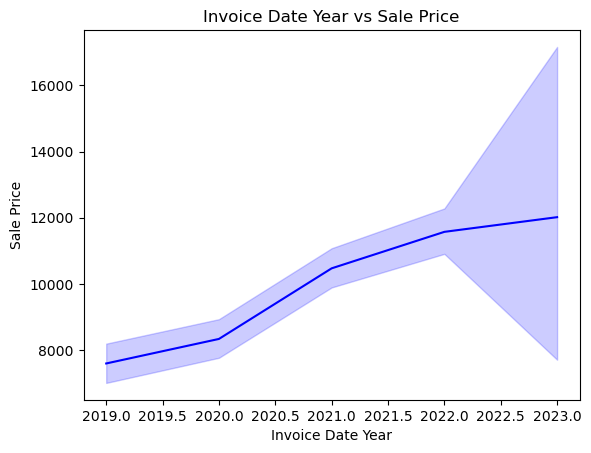

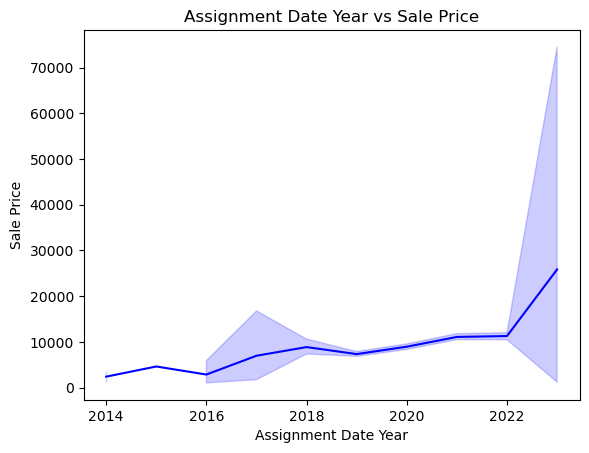

In [29]:
# Examining the effect between Sale Price and Year of sale & Sale Price & Year in which the unit was assigned to Company
years_columns = ['Invoice Date Year', 'Assignment Date Year']

for year_column in years_columns:
    sns.lineplot(x=year_column, y='Sale Price', data=Sales_data,color='blue')
    plt.xlabel(f'{year_column}')
    plt.ylabel('Sale Price')
    plt.title(f'{year_column} vs Sale Price')
    plt.show()

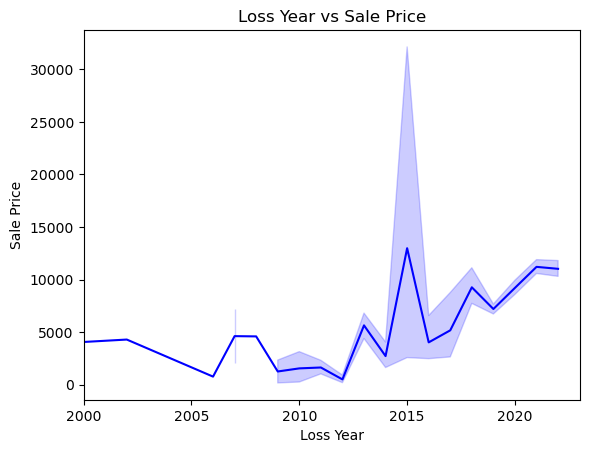

In [30]:
sns.lineplot(x='Loss Date Year', y='Sale Price', data=Sales_data,color='blue')
plt.xlim(2000,2023)
plt.xlabel('Loss Year')
plt.ylabel('Sale Price')
plt.title('Loss Year vs Sale Price')
plt.show()

In [31]:
# Over the time Sale Price of units sold through Company has been increasing since 2019.
# There is no such pattern observed for Cars assigned or Loss event occured on Sale Price.

Text(0.5, 1.0, 'Sale Price Vs Odometer')

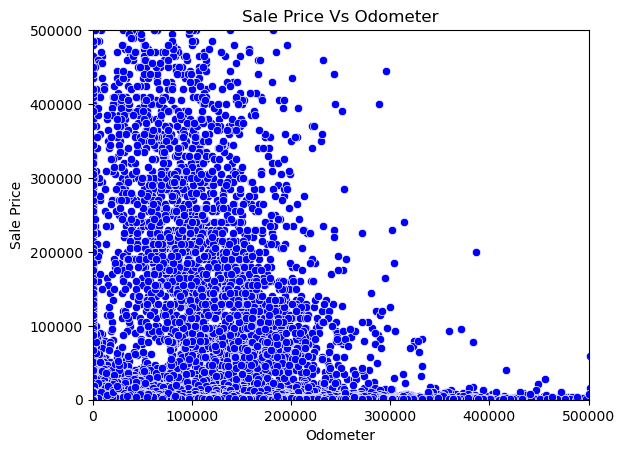

In [32]:
# Sale Price vs Odometer reading

sns.scatterplot(y='Sale Price', x='Odometer', data=Sales_data,color='blue')
plt.xlim(0, 500000)  # Adjust these values based on your preference
plt.ylim(0, 500000)
plt.title('Sale Price Vs Odometer')

In [33]:
#From the above plot, we can depict that as Odometer reading increases, Sale Price of the unit decreases

Text(0.5, 1.0, 'Sale Price Vs Repair Estimate')

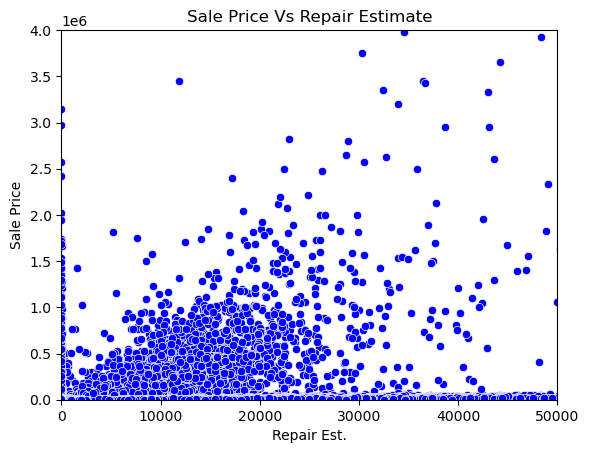

In [34]:
# Sale Price vs Repair estimate

sns.scatterplot(y='Sale Price', x='Repair Est.', data=Sales_data,color='blue')
plt.xlim(0, 50000)  # Adjust these values based on your preference
plt.ylim(0, 4000000)
plt.title('Sale Price Vs Repair Estimate')

In [35]:
#As Repair Estimate increases, Sale Price increases

Text(0.5, 1.0, 'Sale Price Vs ACV')

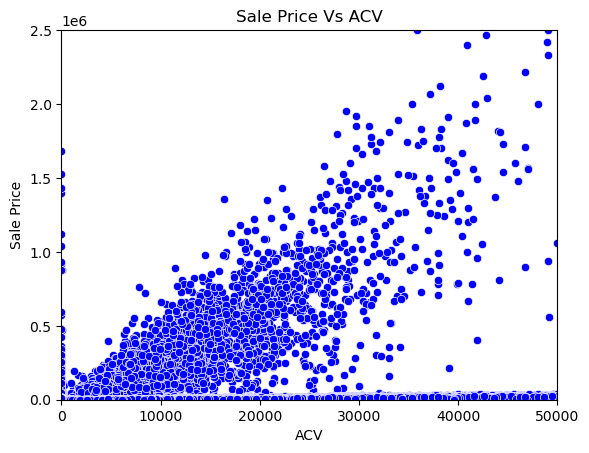

In [36]:
# Sale Price vs ACV

sns.scatterplot(y='Sale Price', x='ACV', data=Sales_data,color='blue')
plt.xlim(0, 50000)  # Adjust these values based on your preference
plt.ylim(0, 2500000)
plt.title('Sale Price Vs ACV')

In [37]:
#As ACV increases, Sale price increases

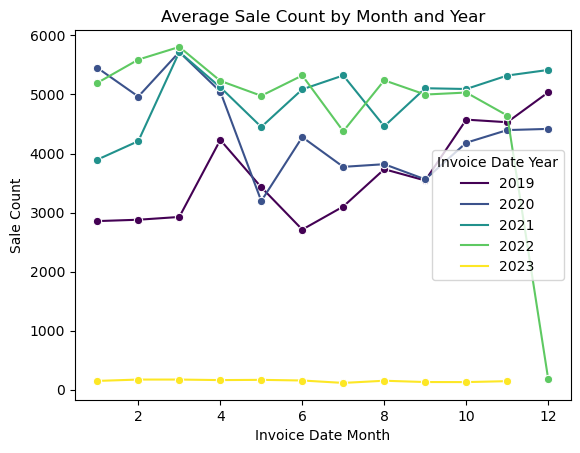

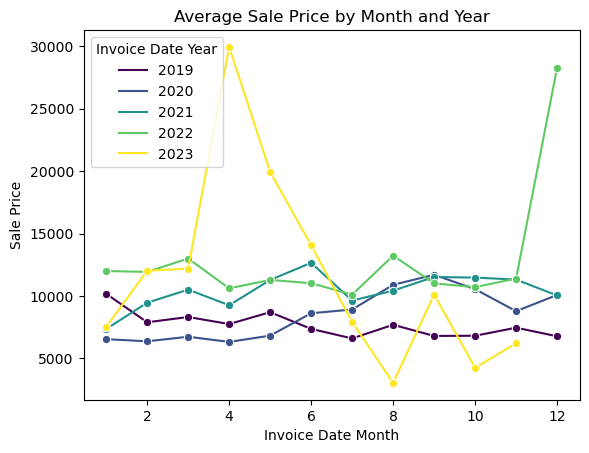

In [38]:
#Average Sale Count and Sale Price by Year and Month

average_count_by_invoice_month_year = Sales_data.groupby(['Invoice Date Year', 'Invoice Date Month'])['Sale Price'].count().reset_index()
line_plot = sns.lineplot(x='Invoice Date Month', y='Sale Price', hue='Invoice Date Year', data=average_count_by_invoice_month_year,palette='viridis', marker='o')
plt.title('Average Sale Count by Month and Year')
plt.ylabel('Sale Count')
plt.show()

average_sale_price_by_invoice_month_year = Sales_data.groupby(['Invoice Date Year', 'Invoice Date Month'])['Sale Price'].mean().reset_index()
line_plot = sns.lineplot(x='Invoice Date Month', y='Sale Price', hue='Invoice Date Year', data=average_sale_price_by_invoice_month_year,palette='viridis', marker='o')
plt.title('Average Sale Price by Month and Year')
plt.show()

Assignment Date Year
2014        2
2015        1
2016        9
2017       76
2018     6362
2019    48945
2020    52301
2021    60443
2022    45608
2023       38
Name: Sale Price, dtype: int64

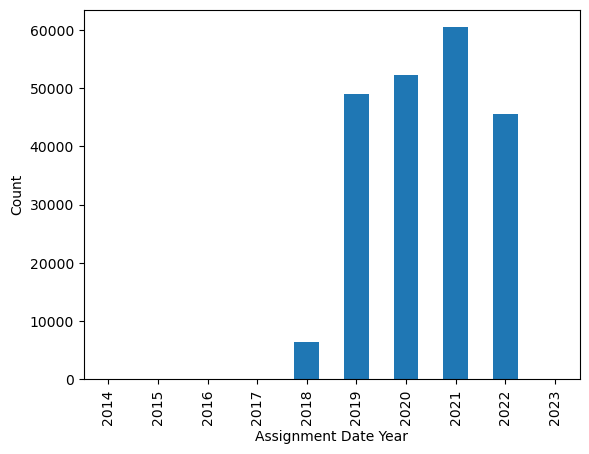

In [39]:
units_assigned_by_year = Sales_data.groupby('Assignment Date Year')['Sale Price'].count()
units_assigned_by_year.plot(kind='bar')
plt.ylabel('Count')
units_assigned_by_year

Text(0.5, 1.0, 'Avg Sale Price Vs Lot Year')

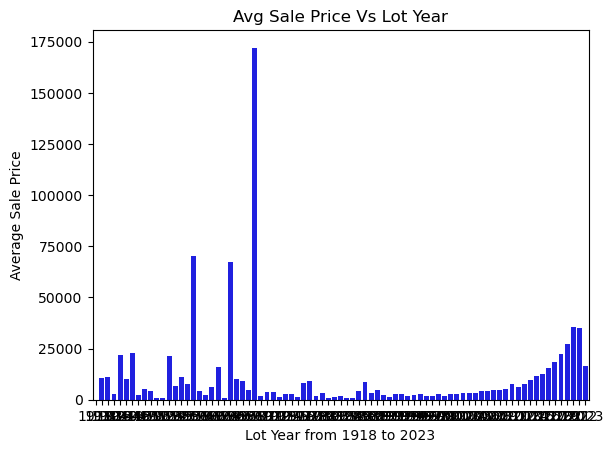

In [40]:
# Relationship between Lot Year and Sale Price

LotYear_by_SalePrice = Sales_data.groupby('Lot Year')['Sale Price'].mean().reset_index()
sns.barplot(y='Sale Price', x='Lot Year', data=LotYear_by_SalePrice, color='blue')
plt.xlabel('Lot Year from 1918 to 2023')
plt.ylabel('Average Sale Price')
plt.title('Avg Sale Price Vs Lot Year')


In [41]:
# Sale Price is greater if Lot Year is recent. However, there are exceptions wherein spikes can be seen in the data for older classic models which are not sold in the market now

Text(0.5, 1.0, 'Top 10 Manufacturers as per Avg Sale Price')

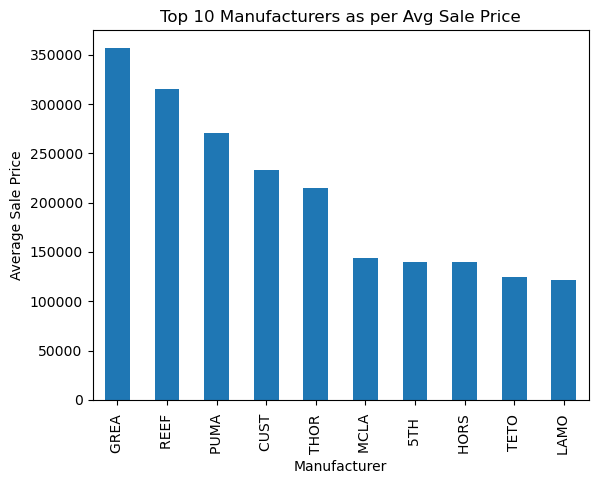

In [42]:
# Top 10 Manufacturers with highest Sale Price

avg_SP_Make = Sales_data.groupby('Make')['Sale Price'].mean().nlargest(10)
avg_SP_Make.plot(kind='bar')
plt.xlabel('Manufacturer')
plt.ylabel('Average Sale Price')
plt.title('Top 10 Manufacturers as per Avg Sale Price')

Text(0.5, 1.0, 'Top 10 Models as per Avg Sale Price')

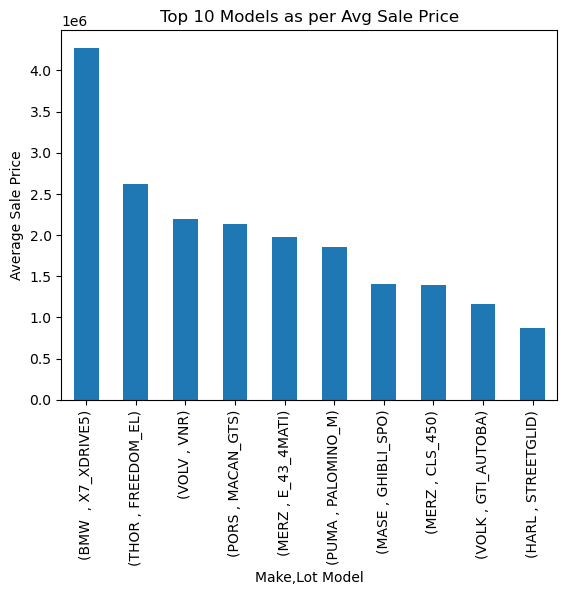

In [43]:
# Top 10 Models as per Average Sale Price

avg_SP_Make = Sales_data.groupby(['Make','Lot Model'])['Sale Price'].mean().nlargest(10)
avg_SP_Make.plot(kind='bar')
plt.ylabel('Average Sale Price')
plt.title('Top 10 Models as per Avg Sale Price')

Text(0.5, 1.0, 'Top 10 Models as per Sale Count')

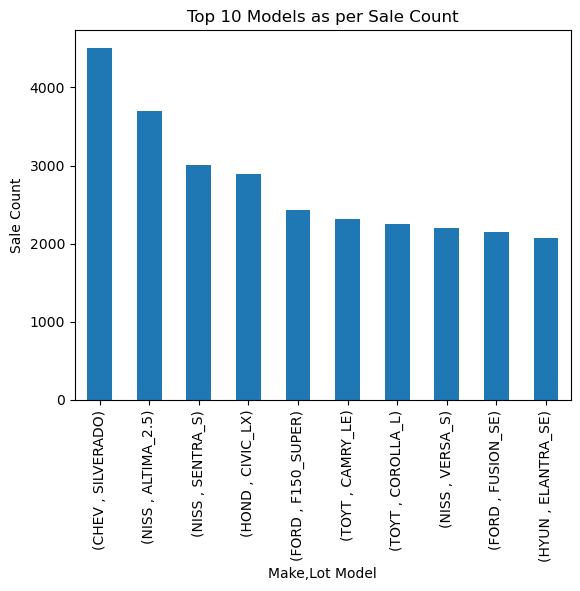

In [44]:
avg_SP_Make = Sales_data.groupby(['Make','Lot Model'])['Sale Price'].count().nlargest(10)
avg_SP_Make.plot(kind='bar')
plt.ylabel('Sale Count')
plt.title('Top 10 Models as per Sale Count')

In [45]:
# Top 5 models of Top 10 Manufacturers

# Find the top 10 manufacturers based on sale count
top10_manufacturers = Sales_data['Make'].value_counts().nlargest(10).index.tolist()

# Filter the DataFrame to include only the top 10 manufacturers
df_top10_manufacturers = Sales_data[Sales_data['Make'].isin(top10_manufacturers)]

# Group by Manufacturer and Model to get sale count for each combination
manufacturer_model_counts = df_top10_manufacturers.groupby(['Make', 'Lot Model'])['Sale Price'].count().reset_index(name='Sale Count')


# Sort by Sale Count in descending order to find the top models for each manufacturer
manufacturer_model_counts = manufacturer_model_counts.sort_values(by=['Make', 'Sale Count'], ascending=[True, False])

# Get the top 5 models for each of the top 10 manufacturers
top5_models_per_manufacturer = manufacturer_model_counts.groupby('Make').head(5)

fig = px.bar(top5_models_per_manufacturer,
             x='Make',
             y='Sale Count',
             color='Lot Model',
             labels={'Make': 'Manufacturer', 'Sale Count': 'Sale Count'},
             title='Top 5 Models for top 10 Manufacturers - Sale Count',
             width=800,
             height=600)

# Customize the layout
fig.update_layout(xaxis_title='Manufacturer', yaxis_title='Sale Count')
fig.update_layout(legend_title='Lot Model')
fig.update_layout(legend=dict(x=1.05, y=1))

# Show the plot
fig.show()

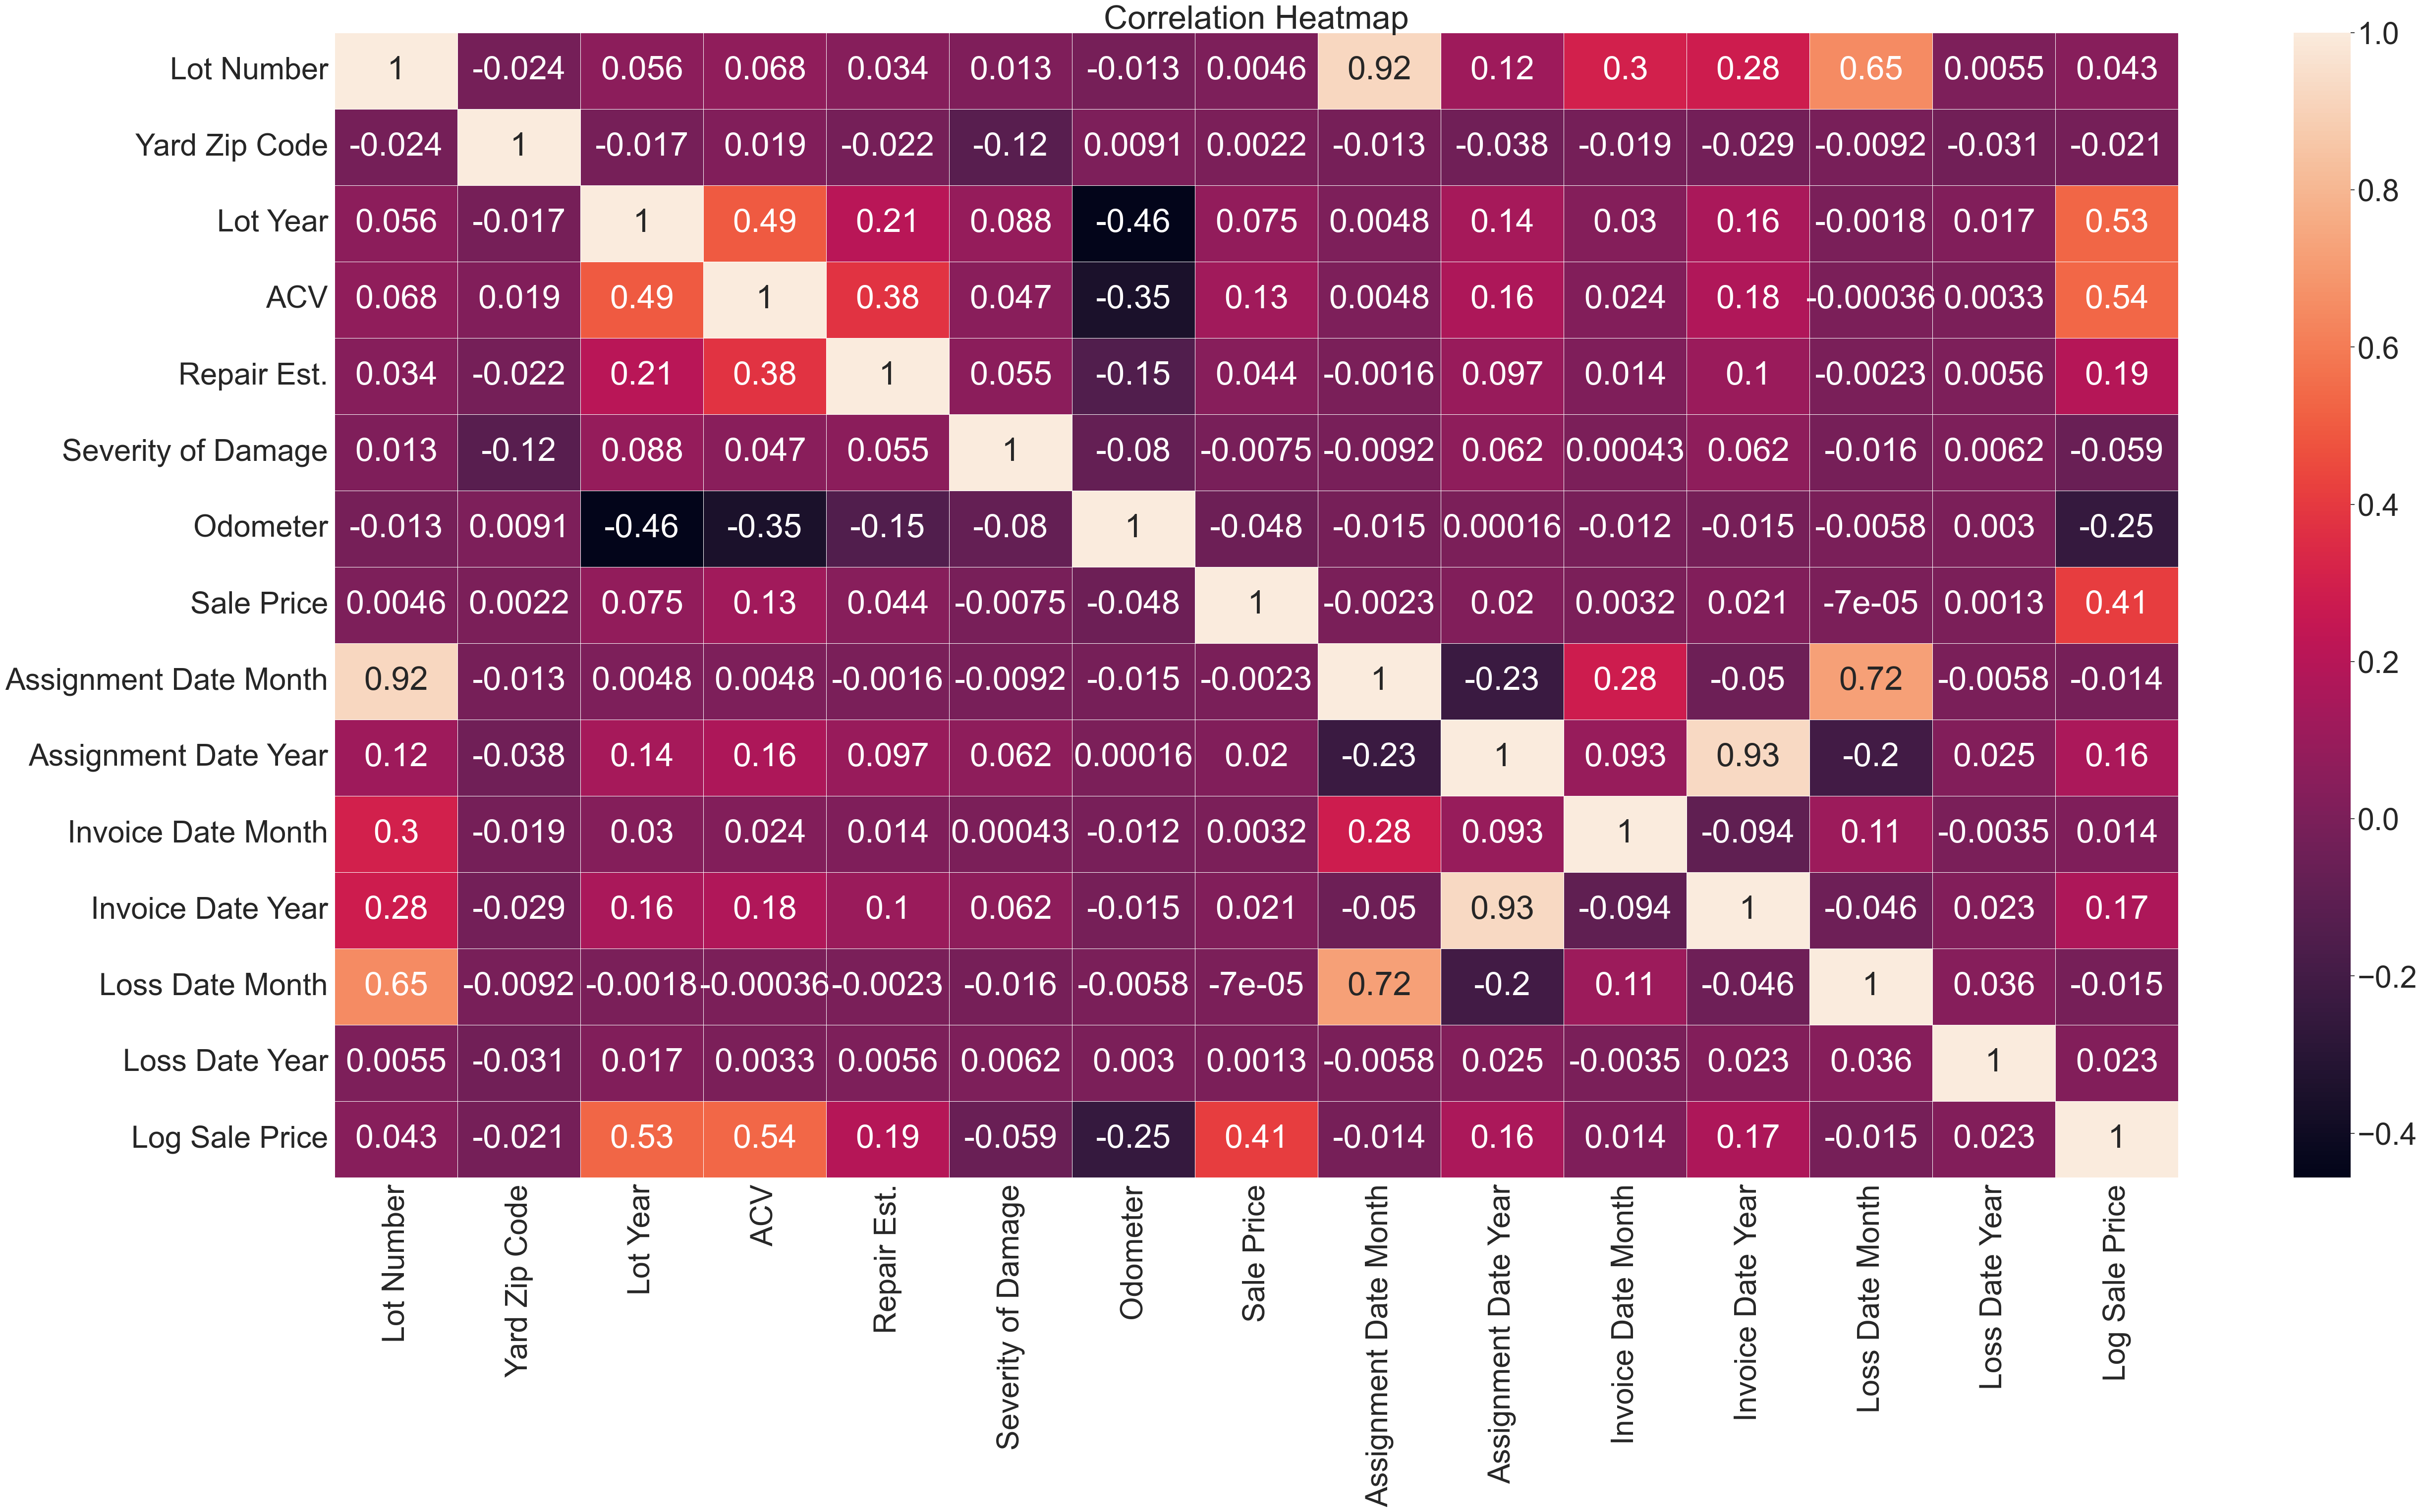

In [46]:
# Correlation Analysis - Heatmap

corr_matrix = Sales_data.corr()

plt.figure(figsize=(60, 30))  # Increase the figure size
sns.set(font_scale=4)  # Adjust font size for annotations
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Data Preparation:

Below steps were followed for Data Preparation:

1. Dropped Irrelevant columns from the dataset like Lot Number, Assignment Year, Assignment Month, Sale Price (as we will be using Log Sale Price as target Variable).
2. Performed One Hot encoding on 'Vehicle Type','Primary Damage Type','Has Keys','Odometer Brand','Title Group','Run Condition'.
3. Performed Binary Encoding on 'Lot Model' and 'Make' as there were high number of categories (high-cardinality). One-hot encoding can lead to a large number of columns, which may use high memory and computational resources and  may also result in the curse of dimensionality.
4. Ensured that each and every column in the dataset is numerical and not categorical so that we can use it for Model implementation.
5. Created a Target Variable 'y' with Log Sale Price values. Created predictors in 'X' by dropping Log Sale Price from the existing dataframe.
6. Data Splitting in to training and test set by using 30% od the data as test set.
7. Performed Standard scaling on X to standardize the range of features. Standard scaling is basically transforming the data so that it has a mean of 0 and a standard deviation of 1. 
8. Used this scaled data (X_train_sc & X_test_Sc) during model implementations.

In [47]:
# Data Preparation for Model Implementations

Sales_data.head()


Lot Number  Yard Zip Code Vehicle Type  Lot Year   Make   Lot Model  \
0    26891434          87105            V      2012  HOND     CIVIC_LX   
2    57623533          85043            V      2006  ACUR          TSX   
3    46910394          85043            V      2013  NISS      VERSA_S   
4    43189105          85706            V      2004  DODG   RAM_1500_S   
5    55144546          87105            V      2001  CHEV   CAMARO_Z28   

        ACV  Repair Est. Primary Damage Type  Severity of Damage  ...  \
0   5930.00     10723.42                  FR                   1  ...   
2   5981.05      8298.99                  FR                   2  ...   
3   6155.00      6133.36                  FR                   2  ...   
4   7312.68      5611.12                  FR                   1  ...   
5  14445.00     14445.00                  FR                   2  ...   

  Odometer Brand Has Keys  Sale Price Assignment Date Month  \
0              N        Y      1700.0                     1   
2              A        Y       800.0                    11   
3              A        Y      2000.0                     8   
4              A        Y      2200.0                     5   
5              A        Y      2250.0                     8   

  Assignment Date Year  Invoice Date Month  Invoice Date Year  \
0                 2020                   2               2020   
2                 2019                   2               2020   
3                 2020                   9               2020   
4                 2021                   6               2021   
5                 2022                   8               2022   

   Loss Date Month  Loss Date Year  Log Sale Price  
0                1            2020        7.438972  
2               11            2019        6.685861  
3                8            2020        7.601402  
4                5            2021        7.696667  
5                8            2022        7.719130  

[5 rows x 23 columns]

In [50]:
Sales_data.nunique()

Lot Number               199724
Yard Zip Code                 3
Vehicle Type                 14
Lot Year                     81
Make                        603
Lot Model                  4954
ACV                       71556
Repair Est.              150863
Primary Damage Type          25
Severity of Damage            4
Run Condition                 3
Title Group                   3
Odometer                 121005
Odometer Brand                4
Has Keys                      3
Sale Price                  872
Assignment Date Month        12
Assignment Date Year         10
Invoice Date Month           12
Invoice Date Year             5
Loss Date Month              13
Loss Date Year               20
Log Sale Price              872
dtype: int64

In [51]:
# Drop columns which are not required for predictions
Sales_data.drop(columns=['Assignment Date Year','Sale Price','Invoice Date Year', 'Loss Date Year','Assignment Date Month','Loss Date Month','Invoice Date Month','Lot Number'], inplace=True)

In [52]:
Sales_data.head()

Yard Zip Code Vehicle Type  Lot Year   Make   Lot Model       ACV  \
0          87105            V      2012  HOND     CIVIC_LX   5930.00   
2          85043            V      2006  ACUR          TSX   5981.05   
3          85043            V      2013  NISS      VERSA_S   6155.00   
4          85706            V      2004  DODG   RAM_1500_S   7312.68   
5          87105            V      2001  CHEV   CAMARO_Z28  14445.00   

   Repair Est. Primary Damage Type  Severity of Damage Run Condition  \
0     10723.42                  FR                   1             D   
2      8298.99                  FR                   2             S   
3      6133.36                  FR                   2             D   
4      5611.12                  FR                   1             D   
5     14445.00                  FR                   2             D   

  Title Group  Odometer Odometer Brand Has Keys  Log Sale Price  
0           S         0              N        Y        7.438972  
2           S    141147              A        Y        6.685861  
3           S     98347              A        Y        7.601402  
4           S    186776              A        Y        7.696667  
5           S    142273              A        Y        7.719130

In [53]:
#Categorical Column Encoding

#One hot encoding

columns_to_encode=['Vehicle Type','Primary Damage Type','Has Keys','Odometer Brand','Title Group','Run Condition']
Sales_data = pd.get_dummies(Sales_data, columns=columns_to_encode, prefix=columns_to_encode)

In [54]:
# Binary Encoding for Lot Model and Make as the number of categories are more

binary_encoder = ce.BinaryEncoder(cols=['Make','Lot Model'])
Sales_data = binary_encoder.fit_transform(Sales_data)

In [55]:
Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213785 entries, 0 to 226012
Data columns (total 82 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Yard Zip Code           213785 non-null  int64  
 1   Lot Year                213785 non-null  int64  
 2   Make_0                  213785 non-null  int64  
 3   Make_1                  213785 non-null  int64  
 4   Make_2                  213785 non-null  int64  
 5   Make_3                  213785 non-null  int64  
 6   Make_4                  213785 non-null  int64  
 7   Make_5                  213785 non-null  int64  
 8   Make_6                  213785 non-null  int64  
 9   Make_7                  213785 non-null  int64  
 10  Make_8                  213785 non-null  int64  
 11  Make_9                  213785 non-null  int64  
 12  Lot Model_0             213785 non-null  int64  
 13  Lot Model_1             213785 non-null  int64  
 14  Lot Model_2         

In [56]:
#Data Copy

Sales_data_copy = Sales_data.copy()


In [57]:
# Data Splitting
y = Sales_data['Log Sale Price']
X = Sales_data.drop(columns=['Log Sale Price']).copy()

In [58]:
X.columns

Index(['Yard Zip Code', 'Lot Year', 'Make_0', 'Make_1', 'Make_2', 'Make_3',
       'Make_4', 'Make_5', 'Make_6', 'Make_7', 'Make_8', 'Make_9',
       'Lot Model_0', 'Lot Model_1', 'Lot Model_2', 'Lot Model_3',
       'Lot Model_4', 'Lot Model_5', 'Lot Model_6', 'Lot Model_7',
       'Lot Model_8', 'Lot Model_9', 'Lot Model_10', 'Lot Model_11',
       'Lot Model_12', 'ACV', 'Repair Est.', 'Severity of Damage', 'Odometer',
       'Vehicle Type_A', 'Vehicle Type_C', 'Vehicle Type_D', 'Vehicle Type_E',
       'Vehicle Type_H', 'Vehicle Type_J', 'Vehicle Type_K', 'Vehicle Type_L',
       'Vehicle Type_M', 'Vehicle Type_R', 'Vehicle Type_S', 'Vehicle Type_U',
       'Vehicle Type_Unknown', 'Vehicle Type_V', 'Primary Damage Type_AO',
       'Primary Damage Type_BC', 'Primary Damage Type_BE',
       'Primary Damage Type_BI', 'Primary Damage Type_BN',
       'Primary Damage Type_DH', 'Primary Damage Type_FD',
       'Primary Damage Type_FR', 'Primary Damage Type_HL',
       'Primary Damage Type

In [59]:
#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

In [60]:
#Scaling the Dataset

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Model Implementations:

I have applied below models for predicting the Sale Price:

1. Linear Regression
2. Lasso Regression
3. Ridge Regression
4. Decision Tree Regressor
5. Random Forest Regressor
6. XGBoost Regressor

**Linear Regression Model :**

In [58]:
#Linear Regression model
LRModel = LinearRegression()
LRModel.fit(X_train_sc, y_train)

LinearRegression()

In [59]:
#Output Metrics for Linear Regression
y_pred = LRModel.predict(X_test_sc)

R2_Linear_train = LRModel.score(X_train_sc,y_train)
R2_Linear_test = LRModel.score(X_test_sc,y_test)

print('Output Metrics for Linear Regression: \n')
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Training R-squared       : ', R2_Linear_train)
print('Test R-squared           : ', R2_Linear_test)

Output Metrics for Linear Regression: 

Mean Absolute Error      :  0.5451978496665016
Mean Squared  Error      :  0.9192425613571595
Root Mean Squared  Error :  0.9587713811734054
Training R-squared       :  0.4833436688914039
Test R-squared           :  0.4230148529653863


**Lasso Regression Model :**

In [60]:
#Lasso Regression Model

lasso_params = {'alpha' :  [0.01, 0.1, 1, 10] }

lasso = Lasso(random_state=42)
grid_lasso = GridSearchCV(lasso, lasso_params, cv = 5)
grid_lasso.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid={'alpha': [0.01, 0.1, 1, 10]})

In [61]:
#Output Metrics for Lasso Regression
y_pred = grid_lasso.predict(X_test_sc)

R2_Lasso_train = grid_lasso.score(X_train_sc,y_train)
R2_Lasso_test = grid_lasso.score(X_test_sc,y_test)

print('Parameter for chosen model: ', grid_lasso.best_params_)

print('Output Metrics for Lasso Regression:')
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Training R-squared       : ', R2_Lasso_train)
print('Test R-squared           : ', R2_Lasso_test)

Parameter for chosen model:  {'alpha': 0.01}
Output Metrics for Lasso Regression:
Mean Absolute Error      :  0.5487408684473832
Mean Squared  Error      :  0.923131650064787
Root Mean Squared  Error :  0.9607974032358679
Training R-squared       :  0.48044097853344714
Test R-squared           :  0.42057377102017246


**Ridge Regression Model :**

In [62]:
#Ridge Regression Model

ridge_params = {  'alpha' :  [0.001, 0.01, 0.1, 1, 10,100]  }
ridge = Ridge(random_state=42)
grid_ridge = GridSearchCV(ridge, ridge_params, cv = 5)
grid_ridge.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [63]:
#Output Metrics for Lasso Regression
y_pred = grid_ridge.predict(X_test_sc)

R2_Ridge_train = grid_ridge.score(X_train_sc,y_train)
R2_Ridge_test = grid_ridge.score(X_test_sc,y_test)

print('Parameter for chosen model: ', grid_ridge.best_params_)

print('Output Metrics for Ridge Regression:')
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Training R-squared       : ', R2_Ridge_train)
print('Test R-squared           : ', R2_Ridge_test)

Parameter for chosen model:  {'alpha': 100}
Output Metrics for Ridge Regression:
Mean Absolute Error      :  0.5452705587945802
Mean Squared  Error      :  0.9190254989389457
Root Mean Squared  Error :  0.9586581762750191
Training R-squared       :  0.4833526686018773
Test R-squared           :  0.42315109751775326


**Decision Tree Regressor Model :**

Hyperparameter used: max_depth - I tried with values from 5 to 12 and observed that Decision Tree with max depth 10 would be appropriate as increasing the value above 10 introduced overfitting and decreasing it below 10 reduced the training and the test accuracy(underfitting). 

In [61]:
# Decision Tree

decision_tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)
decision_tree_model.fit(X_train_sc, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [62]:
#Output Metrics for Decision Tree Regressor Model
y_pred = decision_tree_model.predict(X_test_sc)

R2_dt_train = decision_tree_model.score(X_train_sc,y_train)
R2_dt_test = decision_tree_model.score(X_test_sc,y_test)

print('Output Metrics for Decision Tree Regressor Model: \n')
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Training R-squared       : ', R2_dt_train)
print('Test R-squared           : ', R2_dt_test)

Output Metrics for Decision Tree Regressor Model: 

Mean Absolute Error      :  0.4855139835357079
Mean Squared  Error      :  0.7392305757856651
Root Mean Squared  Error :  0.8597851916529298
Training R-squared       :  0.5940170647205991
Test R-squared           :  0.5360037922608183


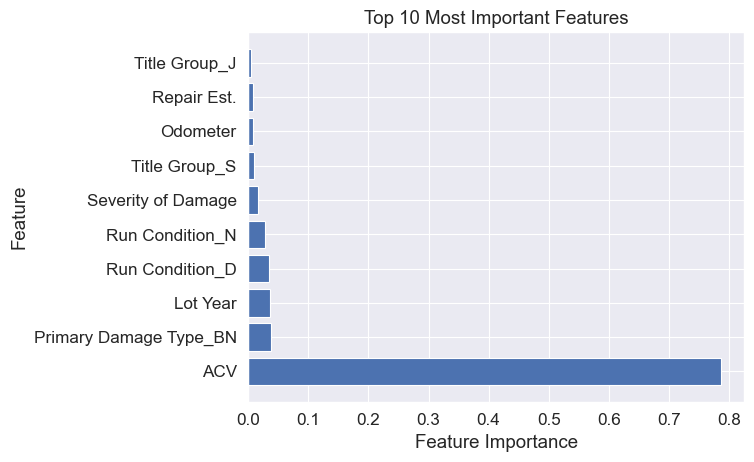

In [63]:
# Get feature importances
sns.set_context('paper', font_scale=1.4)

feature_importances = decision_tree_model.feature_importances_

# Create a DataFrame to combine features and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Select the top 10 most important features
top10_features = feature_importance_df.nlargest(10, 'Importance')

# Plot the horizontal bar chart
plt.barh(top10_features['Feature'], top10_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()

***Important features as per Decision Tree Model : ACV, Primary Damage Type, Run Condition, Severity of Damage, Title Group, Odometer, Repair Estimate.***

**Random Forest Regressor Model :**

Hyperparameter used: max_depth - (as per decision tree model), n_estimators - I tried with values like 50, 75, 100, 120, 150, 170, 200 and observed that 150 would be appropriate as increasing the value above 150 introduced overfitting and decreasing it below 150 reduced the training and the test accuracy(underfitting).

In [68]:
# Random Forest

rf = RandomForestRegressor(n_estimators=150,max_depth=10,random_state=42)
rf.fit(X_train_sc, y_train)

RandomForestRegressor(max_depth=10, n_estimators=150, random_state=42)

In [69]:
#Output Metrics for Random Forest Regressor Model
y_pred = rf.predict(X_test_sc)

R2_rf_train = rf.score(X_train_sc,y_train)
R2_rf_test = rf.score(X_test_sc,y_test)

print('Output Metrics for Random Forest Regressor Model: \n')
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Training R-squared       : ', R2_rf_train)
print('Test R-squared           : ', R2_rf_test)

Output Metrics for Random Forest Regressor Model: 

Mean Absolute Error      :  0.4651752410152679
Mean Squared  Error      :  0.6875409795034835
Root Mean Squared  Error :  0.8291809087910089
Training R-squared       :  0.6122353503416635
Test R-squared           :  0.568448035559347


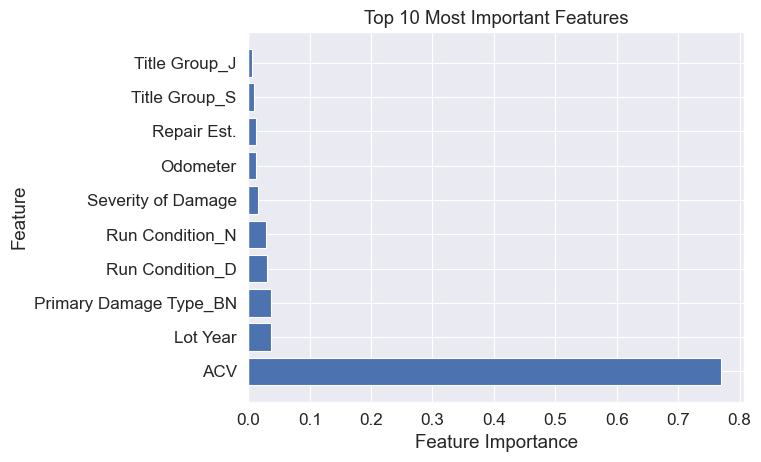

In [70]:
# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to combine features and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Select the top 10 most important features
top10_features = feature_importance_df.nlargest(10, 'Importance')

# Plot the horizontal bar chart
plt.barh(top10_features['Feature'], top10_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()

***Important features as per Random Forest Regressor Model : ACV, Lot Year, Primary Damage Type, Run Condition, Severity of Damage, Odometer, Repair Estimate, Title Group.***

**XGBoost Regressor Model :**

In [71]:
# XGBoost Regressor

XGB = XGBRegressor(n_estimators=150, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8, random_state=42)
XGB.fit(X_train_sc,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=150,
             n_jobs=None, num_parallel_tree=None, ...)

In [72]:
#Output Metrics for XGBoost Regressor Model
y_pred = XGB.predict(X_test_sc)

R2_XGB_train = XGB.score(X_train_sc,y_train)
R2_XGB_test = XGB.score(X_test_sc,y_test)

print('Output Metrics for XGBoost Regressor Model: \n')
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Training R-squared       : ', R2_XGB_train)
print('Test R-squared           : ', R2_XGB_test)

Output Metrics for XGBoost Regressor Model: 

Mean Absolute Error      :  0.4260714534541979
Mean Squared  Error      :  0.6383174409939146
Root Mean Squared  Error :  0.798947708547884
Training R-squared       :  0.7559455001516412
Test R-squared           :  0.5993443971927511


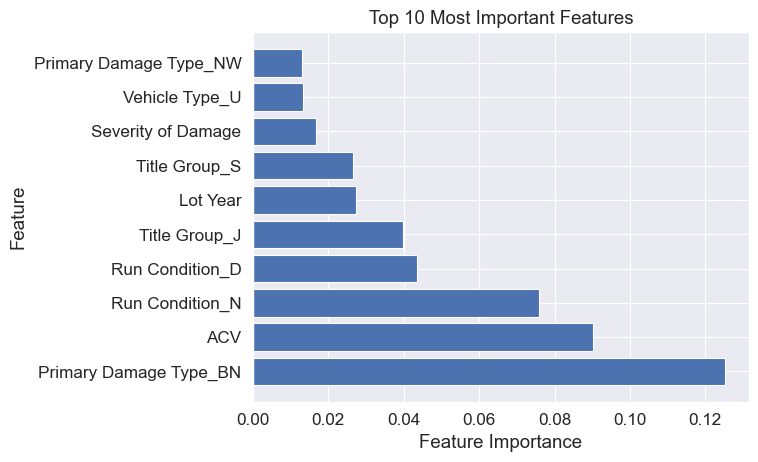

In [75]:
# Get feature importances
feature_importances = XGB.feature_importances_

# Create a DataFrame to combine features and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Select the top 10 most important features
top10_features = feature_importance_df.nlargest(10, 'Importance')

# Plot the horizontal bar chart
plt.barh(top10_features['Feature'], top10_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()

***Important features as per XGBoost Regressor Model : Primary Damage Type, ACV, Run Condition, Title Group, Lot Year, Severity of Damage, Vehicle Type***

***Note:***

As we have considered 'Log Sale Price' as target variable, while predicting the actual Sale Price it needs to be converted back to its original form i.e. we have to exponentiate to get predictions in the original scale.

We can do it by using below line of code after predicting y_test.

**predicted_sale_price = np.expm1(y_pred)**

where y_pred = model.predict(X_test_sc)

**Model Comparison:**

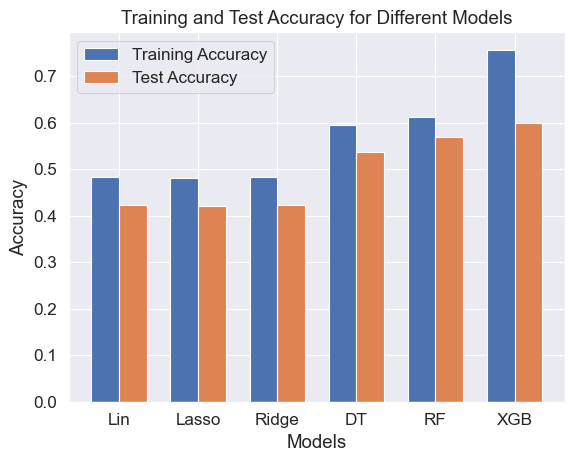

In [76]:
sns.set_context('paper', font_scale=1.4)

model_names = ['Lin', 'Lasso', 'Ridge', 'DT', 'RF', 'XGB']
train_scores = [R2_Linear_train, R2_Lasso_train, R2_Ridge_train, R2_dt_train, R2_rf_train, R2_XGB_train]
test_scores = [R2_Linear_test, R2_Lasso_test, R2_Ridge_test, R2_dt_test, R2_rf_test, R2_XGB_test ]


bar_width = 0.35
index = np.arange(len(model_names))

plt.bar(index, train_scores, bar_width, label='Training Accuracy')
plt.bar(index + bar_width, test_scores, bar_width, label='Test Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy for Different Models')

plt.xticks(index + bar_width / 2, model_names)

plt.legend(loc='best')
plt.show()

# Conclusion:
1. Out of all the models implemented, XGBoost Regressor gave the best test accuracy of 59.93% followed by Random Forest and Decision Tree.
2. Some of the important features in predicting Sale price would be ACV, Primary Damage Type, Run Condition, Odometer, Lot Year, Severity of Damage, Odometer, Repair Estimate, Title Group.